# Number of men and women who survived by passenger class
figure(figsize=(10,8))
graphs_df.groupby(['sex', 'survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Passenger survival')
plt.show()


----


import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

graphs_df.groupby(['sex', 'survived']).size().groupby(level=0).apply(
    lambda x: 100 * x/x.sum()
).unstack().plot(kind='bar', stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import figure

In [3]:
# Read in the dataset - data sourced from https://www.kaggle.com/datasets/vinicius150987/titanic3
titanic_df = pd.read_excel('data_files/titanic3.xls')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [63]:
# Review the data file in terms of columns, non-nulls and data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


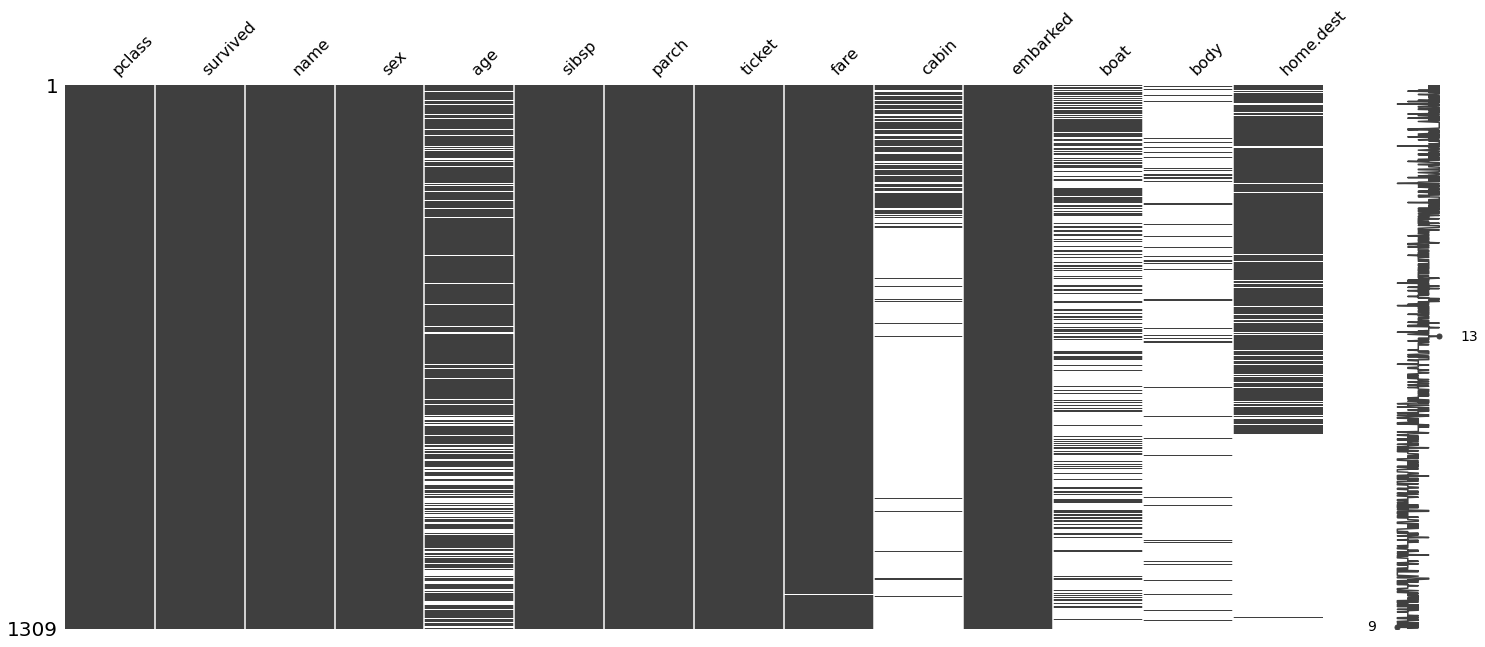

In [64]:
# Checking the amount of missing data
print(titanic_df.isna().sum())
msno.matrix(titanic_df)

# Exploring the data

In [4]:
# Creating a copy of the dataframe
graph_df = titanic_df.copy()

### Who was onboard?

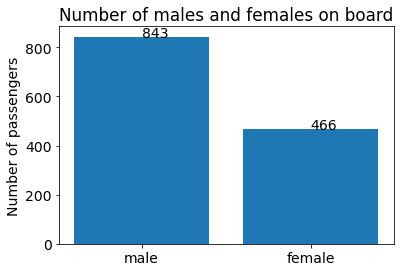

In [66]:
# Looking at the gender split

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# charting the data
sex_distribution = graph_df['sex'].value_counts()
y = sex_distribution.values
x = sex_distribution.index.values
plt.title('Number of males and females on board')
plt.ylabel('Number of passengers')
addlabels(x,y)
plt.rc('font', size=14) 
plt.bar(x, y,);

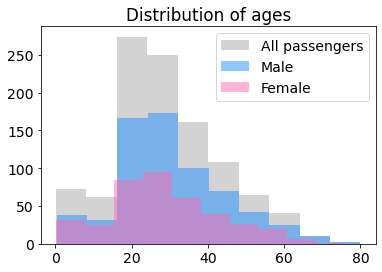

In [67]:
# Age of passenges
age_df = graph_df.dropna(subset=['age'])

# Overall age distribution by gender
x = age_df['age']
x1 = age_df.loc[age_df['sex'] == 'female', 'age']
x2 = age_df.loc[age_df['sex'] == 'male', 'age']

# Plotting the chart
kwargs = dict(alpha=0.5)
plt.hist(x, color='lightgray', label='All passengers')
plt.hist(x2, **kwargs, color='dodgerblue', label='Male')
plt.hist(x1, **kwargs, color='hotpink', label='Female')
plt.title('Distribution of ages')
plt.legend();

In [68]:
# Creating a function to recode pcalss with complete name
def pclass_name(pclass):
    if pclass == 1:
        return "First class"
    elif pclass == 2:
        return "Second class"
    elif pclass == 3:
        return "Third class"
    else:
        return pclass

In [69]:
# Calling the function
graph_df['pclass'] = graph_df['pclass'].apply(pclass_name)
graph_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,First class,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,First class,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,First class,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,First class,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,First class,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


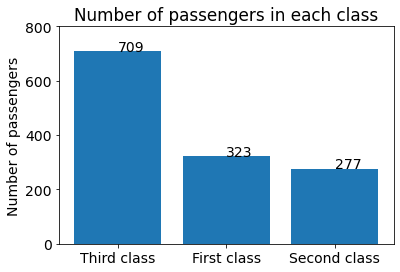

In [77]:
# Charting the data
class_distribution = graph_df['pclass'].value_counts()
y = class_distribution.values
x = class_distribution.index.values
plt.title('Number of passengers in each class')
plt.ylabel('Number of passengers')
addlabels(x,y)
plt.ylim(0,800)
# plt.rc('font', size=12) 
plt.bar(x, y, align='center');

<h7> Passenger class and sex

In [5]:
# Creating the dataframe
pclass_sex = graph_df.groupby(['sex', 'pclass'])['pclass'].count() # grouping the data and counting it
df = pclass_sex.unstack(level=0) # unstacking the data
df


sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


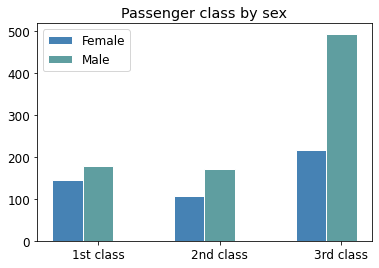

In [10]:
# Chart the data
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = df['female']
bars2 = df['male']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='Female')
plt.bar(r2, bars2, color='cadetblue', width=barWidth, edgecolor='white', label='Male')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],['1st class', '2nd class', '3rd class'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Passenger class by sex')
plt.show()

In [8]:
df.index

Int64Index([1, 2, 3], dtype='int64', name='pclass')

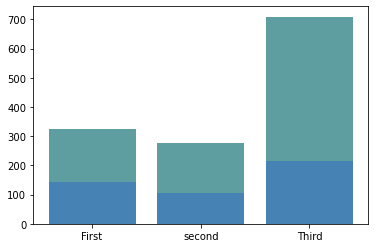

In [11]:
x = ['First', 'second', 'Third']
y1 = df['female']
y2 = df['male']

plt.bar(x, y1, color='steelblue')
plt.bar(x, y2, bottom=y1, color='cadetblue')
plt.show()

<h7> Looking at whether passengers were travelling alone or with family

In [11]:
# Creating a new column that sums together the number of family members they were travelling with
graph_df['family_members'] = graph_df['sibsp'] + graph_df['parch']



In [ ]:
# Creating a fucntion to recode whether they were travelling with family
def family_members(count):
    if count > 0:
        return 'with family'
    elif count == 0:
        return 'alone'
    else:
        return count

In [12]:
# Calling the family_members function
graph_df['with_family'] = graph_df['family_members'].apply(family_members)

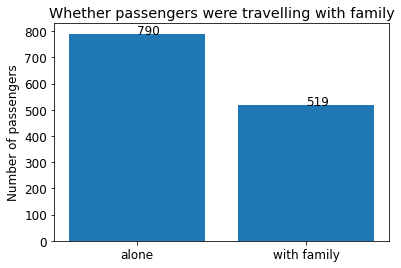

In [13]:
# Charting whether they were travelling with family
class_distribution = graph_df['with_family'].value_counts()
y = class_distribution.values
x = class_distribution.index.values
plt.title('Whether passengers were travelling with family')
plt.ylabel('Number of passengers')
addlabels(x,y)
# plt.rc('font', size=14) 
plt.bar(x, y, align='center');

<h7> Passenger class by whether or not they were travelling with family

In [14]:
# Creating the dataframe
pclass_family = graph_df.groupby(['with_family', 'pclass'])['with_family'].count() # grouping the data and counting it
pclass_family_df = pclass_family.unstack(level=0) # unstacking the data
pclass_family_df


with_family,alone,with family
pclass,,
1st class,160,163
2nd class,158,119
3rd class,472,237


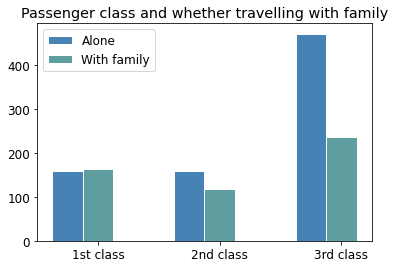

In [15]:
# Chart the data
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = pclass_family_df['alone']
bars2 = pclass_family_df['with family']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='Alone')
plt.bar(r2, bars2, color='cadetblue', width=barWidth, edgecolor='white', label='With family')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],['1st class', '2nd class', '3rd class'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Passenger class and who they were travelling with')
plt.show()

<h7> Looking at passenger class and port they embarked

In [16]:
# Creating a function to recode embarkment points with full names
def embarked_name(embarked):
    if embarked == 'S':
        return "Southampton (UK)"
    elif embarked == 'C':
        return "Cherbourg (FR)"
    elif embarked == 'Q':
        return "Queenstown (IE)"
    else:
        return embarked

In [17]:
# Recoding embarked field
graph_df['embarked'] = graph_df['embarked'].apply(embarked_name)

# Creating the dataframe
pclass_embarked = graph_df.groupby(['pclass', 'embarked'])['embarked'].count() # grouping the data and counting it
pclass_embarked_df = pclass_embarked.unstack(level=0) # unstacking the data
pclass_embarked_df

pclass,1st class,2nd class,3rd class
embarked,,,
Cherbourg (FR),141,28,101
Queenstown (IE),3,7,113
Southampton (UK),177,242,495


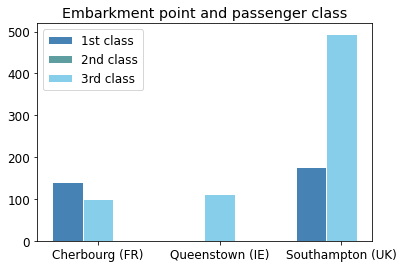

In [18]:
# Chart the data
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = pclass_embarked_df['1st class']
bars2 = pclass_embarked_df['2nd class']
bars2 = pclass_embarked_df['3rd class']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='1st class')
plt.bar(r2, bars2, color='cadetblue', width=barWidth, edgecolor='white', label='2nd class')
plt.bar(r2, bars2, color='skyblue', width=barWidth, edgecolor='white', label='3rd class')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],['Cherbourg (FR)', 'Queenstown (IE)', 'Southampton (UK)'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Embarkment point and passenger class')
plt.show()

## Looking at who survived

<h7> Number of passengers who survived

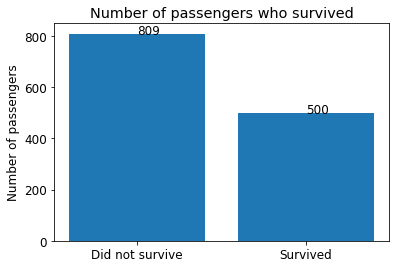

In [19]:
# Number of passengers who survived

# Recoding survived values
graph_df['survived'] = graph_df['survived'].map({0:"Did not survive", 1:'Survived'})

# Charting the data
class_distribution = graph_df['survived'].value_counts()
y = class_distribution.values
x = class_distribution.index.values
plt.title('Number of passengers who survived')
plt.ylabel('Number of passengers')
addlabels(x,y)
plt.rc('font', size=14) 
plt.bar(x, y, align='center');

<h7> Survival by sex

In [20]:
# Creating the dataframe
survived_sex = graph_df.groupby(['survived', 'sex'])['sex'].count() # grouping the data and counting it
survived_sex_df = survived_sex.unstack(level=0) # unstacking the data
survived_sex_df

survived,Did not survive,Survived
sex,,
female,127,339
male,682,161


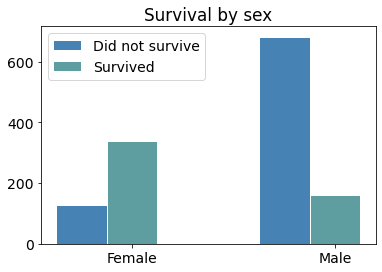

In [21]:
# Chart the data
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = survived_sex_df['Did not survive']
bars2 = survived_sex_df['Survived']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='Did not survive')
plt.bar(r2, bars2, color='cadetblue', width=barWidth, edgecolor='white', label='Survived')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],['Female', 'Male'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Survival by sex')
plt.show()

<h7> Survival by passenger class

In [22]:
# Creating the dataframe
survived_pclass = graph_df.groupby(['survived', 'pclass'])['survived'].count() # grouping the data and counting it
survived_pclass_df = survived_pclass.unstack(level=0) # unstacking the data
survived_pclass_df

survived,Did not survive,Survived
pclass,,
1st class,123,200
2nd class,158,119
3rd class,528,181


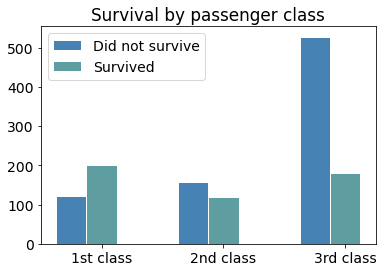

In [23]:
# Chart the data
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = survived_pclass_df['Did not survive']
bars2 = survived_pclass_df['Survived']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='Did not survive')
plt.bar(r2, bars2, color='cadetblue', width=barWidth, edgecolor='white', label='Survived')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],['1st class', '2nd class', '3rd class'])
 
# Create legend & Show graphic
plt.legend()
plt.title('Survival by passenger class')
plt.show()

<h7> Survival by who they were travelling with

In [27]:
# Creating the dataframe
survived_family = graph_df.groupby(['survived', 'with_family'])['survived'].count() # grouping the data and counting it
survived_family_df = survived_family.unstack(level=0) # unstacking the data
survived_family_df

survived,Did not survive,Survived
with_family,,
alone,551,239
with family,258,261


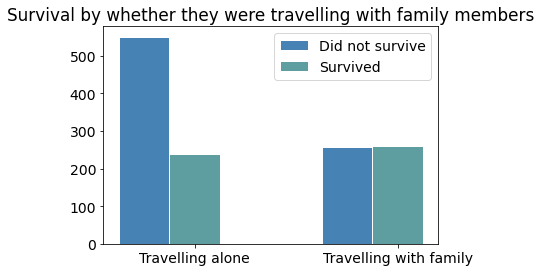

In [25]:
# Chart the data
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = survived_family_df['Did not survive']
bars2 = survived_family_df['Survived']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='steelblue', width=barWidth, edgecolor='white', label='Did not survive')
plt.bar(r2, bars2, color='cadetblue', width=barWidth, edgecolor='white', label='Survived')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],['Travelling alone', 'Travelling with family'])
                                                       
# Create legend & Show graphic
plt.legend()
plt.title('Survival by who they were travelling with')
plt.show()

# Cleaning the data

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


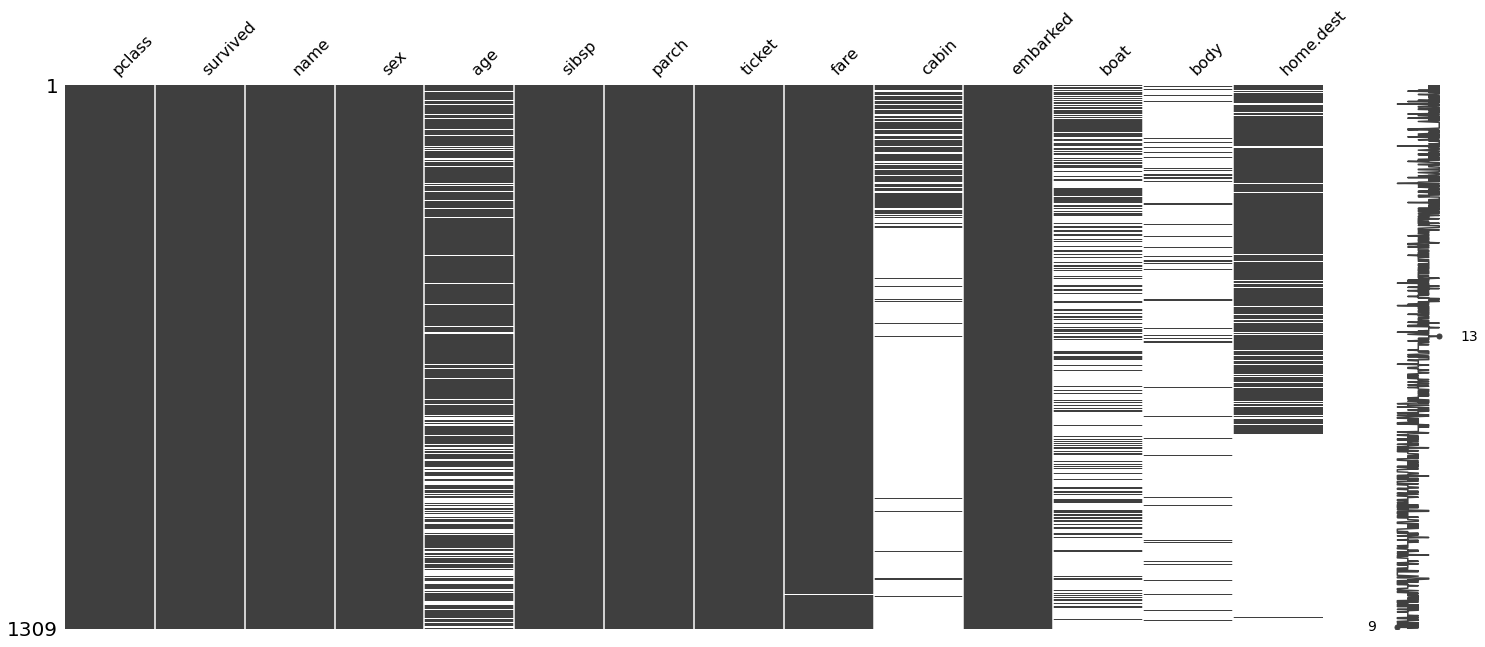

In [29]:
# Looking at the number of missing data
print(titanic_df.isna().sum())
msno.matrix(titanic_df)

### Age - updating null values

In [30]:
# Looking at average age grouped by sex and pclass
grouped = titanic_df.groupby(['pclass'])
grouped['age'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,284.0,39.159918,14.548059,0.9167,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638628,0.6667,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.1667,18.0,24.0,32.0,74.0


In [31]:
# Looking at average age grouped by sex and pclass
grouped = titanic_df.groupby(['pclass', 'sex'])
grouped['age'].describe()

count       mean        std     min   25%   50%    75%   max
pclass sex                                                                 
1      female  133.0  37.037594  14.272460  2.0000  24.0  36.0  48.00  76.0
       male    151.0  41.029250  14.578590  0.9167  30.0  42.0  50.00  80.0
2      female  103.0  27.499191  12.911813  0.9167  20.0  28.0  34.00  60.0
       male    158.0  30.815401  13.977355  0.6667  23.0  29.5  38.75  70.0
3      female  152.0  22.185307  12.205294  0.1667  16.0  22.0  30.00  63.0
       male    349.0  25.962273  11.682395  0.3333  20.0  25.0  32.00  74.0

In [32]:
# Creating function to code null age values based on the average age associated with passenger sex and pclass
def recode_age_nulls(cols):
    age = cols[0]
    pclass = cols[1]
    sex = cols[2]
  
    if pd.isnull(age):
        if pclass == 1 and sex == 'female':
            return 37
        elif pclass == 1 and sex == 'male':
            return 41
        elif pclass == 2 and sex == 'female':
            return 27
        elif pclass == 2 and sex == 'male':
            return 30
        elif pclass == 3 and sex == 'female':
            return 22
        else:
            return 25
    else:
        return age   

In [33]:
# Applying the age function and checking dataframe
titanic_df['age_updated'] = titanic_df[['age', 'pclass', 'sex']].apply(recode_age_nulls, axis=1)
titanic_df[titanic_df.age.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",41.0
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA",41.0
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",41.0
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN,41.0
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY",37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN,25.0
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN,25.0
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,25.0
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN,25.0


### embarked - missing data

In [34]:
# Looking at values for embarked
titanic_df['embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [35]:
# identifying the two rows with missing values
titanic_df[titanic_df.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,38.0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",62.0


Online research found that both passengers with missing embarked data embarked at Southampton
 - https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
 - https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [37]:
# Updating the two missing values

# Creating a copy of the embarked column to append new data to
titanic_df['embarked_updated'] = titanic_df['embarked'].copy()

# Updating missing values for embarked based off the above research
titanic_df.at[168, 'embarked_updated'] = 'S'
titanic_df.at[284, 'embarked_updated'] = 'S'

# Checking change occured
titanic_df.loc[(titanic_df['name'] == 'Icard, Miss. Amelie' ) |
               (titanic_df['name'] == 'Stone, Mrs. George Nelson (Martha Evelyn)'), :]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,38.0,S
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",62.0,S


In [38]:
# Calling the function and saving it to a new column
titanic_df['embarked_updated'] = titanic_df['embarked_updated'].apply(embarked_name)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK)
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK)
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK)
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK)
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK)


### fare

In [39]:
# identifying the passenger with no far noted
titanic_df[titanic_df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,60.5,Southampton (UK)


In [40]:
# finding out the average fare by sex and class
grouped = titanic_df.groupby(['pclass', 'sex'])
grouped['fare'].describe()

count        mean        std    min      25%       50%  \
pclass sex                                                              
1      female  144.0  109.412385  82.885854  25.70  55.4417  80.92915   
       male    179.0   69.888385  74.079427   0.00  27.7208  49.50420   
2      female  106.0   23.234827  11.239817  10.50  13.0000  23.00000   
       male    171.0   19.904946  14.775149   0.00  12.3500  13.00000   
3      female  216.0   15.324250  11.786512   6.75   7.7750  10.48960   
       male    492.0   12.415462  11.261638   0.00   7.7500   7.89580   

                      75%       max  
pclass sex                           
1      female  135.919775  512.3292  
       male     79.200000  512.3292  
2      female   26.250000   65.0000  
       male     26.000000   73.5000  
3      female   17.850000   69.5500  
       male      9.586450   69.5500

In [41]:
# Updating the missing value

# creating a copy of the fare column to append new data to
titanic_df['fare_updated'] = titanic_df['fare'].copy()

# updating missing values for Storey,Mr.Thomas based on the average value for a male travelling in thrid class
titanic_df.at[1225, 'fare_updated'] = 12.4155

# checking change occured
titanic_df.loc[titanic_df['name'] == 'Storey, Mr. Thomas', :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,60.5,Southampton (UK),12.4155


### Cabin

In [42]:
# Checking the number of missing values
titanic_df['cabin'].value_counts(dropna=False)

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F2                    4
                   ... 
B39                   1
B19                   1
D46                   1
E63                   1
C97                   1
Name: cabin, Length: 187, dtype: int64

In [43]:
# Obtaining the deck number by taking the letter from the cabin number
titanic_df['deck'] = titanic_df['cabin'].str.slice(0,1) # taking the first character

# Filling in the missing values for deck with 'Unknown'
titanic_df['deck'] = titanic_df['deck'].fillna("Unknown")
print(titanic_df['deck'].value_counts(dropna=False))

# Checking the dataframe
titanic_df.head()

Unknown    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: deck, dtype: int64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK),211.3375,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK),151.5500,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK),151.5500,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK),151.5500,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK),151.5500,C


### Updaging pclass names

In [52]:
# Calling the function and saving it to a new column
titanic_df['pclass_updated'] = titanic_df['pclass'].apply(pclass_name)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated,deck,pclass_updated
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK),211.3375,B,First class
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK),151.5500,C,First class
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK),151.5500,C,First class
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK),151.5500,C,First class
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK),151.5500,C,First class


### Creating a unique id for each passenger

In [53]:
# creating a unique id for each passenger using the index
titanic_df['passenger_id'] = np.arange(1, len(titanic_df) + 1)
titanic_df = titanic_df.set_index('passenger_id')
titanic_df.reset_index(inplace=True)
titanic_df.head()

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_updated,embarked_updated,fare_updated,deck,pclass_updated
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0000,Southampton (UK),211.3375,B,First class
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.9167,Southampton (UK),151.5500,C,First class
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0000,Southampton (UK),151.5500,C,First class
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0000,Southampton (UK),151.5500,C,First class
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0000,Southampton (UK),151.5500,C,First class


### checking for any further missing values

In [54]:
# checking missing values
titanic_df.isna().sum()

passenger_id           0
pclass                 0
survived               0
name                   0
sex                    0
age                  263
sibsp                  0
parch                  0
ticket                 0
fare                   1
cabin               1014
embarked               2
boat                 823
body                1188
home.dest            564
age_updated            0
embarked_updated       0
fare_updated           0
deck                   0
pclass_updated         0
dtype: int64

In [59]:
titanic_df.columns

Index(['passenger_id', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'age_updated', 'embarked_updated', 'fare_updated', 'deck',
       'pclass_updated'],
      dtype='object')

In [55]:
# Save cleaned data to a csv
titanic_df.to_csv('data_files/titanic_cleaned.csv', index=False, mode='w')

In [58]:
# Saving updated fields to a csv
titanic_updated_fields_df = titanic_df[['passenger_id', 'age_updated', 'embarked_updated', 'fare_updated', 'deck', 'pclass_updated']].copy()
print(titanic_updated_fields_df.info())
titanic_updated_fields_df.to_csv('data_files/titanic_updated_fields.csv', index=False, mode='w')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passenger_id      1309 non-null   int64  
 1   age_updated       1309 non-null   float64
 2   embarked_updated  1309 non-null   object 
 3   fare_updated      1309 non-null   float64
 4   deck              1309 non-null   object 
 5   pclass_updated    1309 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 61.5+ KB
None


In [61]:
# Save original data with passenger_id included to a csv
titanic_original_df = titanic_df[['passenger_id', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']].copy()
print(titanic_original_df.info())
titanic_original_df.to_csv('data_files/titanic_original_fields.csv', index=False, mode='w')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1309 non-null   int64  
 1   pclass        1309 non-null   int64  
 2   survived      1309 non-null   int64  
 3   name          1309 non-null   object 
 4   sex           1309 non-null   object 
 5   age           1046 non-null   float64
 6   sibsp         1309 non-null   int64  
 7   parch         1309 non-null   int64  
 8   ticket        1309 non-null   object 
 9   fare          1308 non-null   float64
 10  cabin         295 non-null    object 
 11  embarked      1307 non-null   object 
 12  boat          486 non-null    object 
 13  body          121 non-null    float64
 14  home.dest     745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB
None
